In [1]:
# Import dependencies
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
# from sklearn.compose import make_column_transformer
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
file_path = 'Resources/customer_data.csv'
df = pd.read_csv(file_path)
df

,id,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at_home_approx,avg_yearly_income,num_children_at_home,store_city,store_state,media_type,cost,promotion_name,store_sales_in_millions
0,0,M,F,1.0,Partial High School,Normal,Skilled Manual,Y,1.0,10000,1.0,Salem,OR,"Daily Paper, Radio",126.62,Bag Stuffers,7.36
1,1,M,M,0.0,Bachelors Degree,Silver,Professional,Y,4.0,50000,0.0,Salem,OR,"Daily Paper, Radio",59.86,Cash Register Lottery,5.52
2,2,S,F,4.0,Partial High School,Normal,Manual,N,1.0,10000,0.0,Salem,OR,"Daily Paper, Radio",84.16,High Roller Savings,3.68
3,3,M,F,2.0,High School Degree,Bronze,Manual,Y,2.0,30000,2.0,Salem,OR,In-Store Coupon,95.78,Cash Register Lottery,3.68
4,4,M,M,0.0,Partial High School,Bronze,Skilled Manual,N,2.0,30000,0.0,Salem,OR,Radio,50.79,Double Down Sale,4.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38887,60421,S,F,2.0,High School Degree,Bronze,Professional,Y,3.0,130000,0.0,San Francisco,CA,Cash Register Handout,127.19,Green Light Special,0.99
38888,60422,S,F,1.0,Partial High School,Bronze,Skilled Manual,N,2.0,50000,0.0,San Francisco,CA,"Sunday Paper, Radio",78.45,Unbeatable Price Savers,1.21
38889,60423,M,F,1.0,Partial High School,Normal,Skilled Manual,Y,1.0,10000,1.0,San Francisco,CA,In-Store Coupon,95.25,You Save Days,2.76
38890,60424,S,F,2.0,High School Degree,Bronze,Skilled Manual,N,2.0,30000,0.0,San Francisco,CA,Sunday Paper,69.42,Price Cutters,1.60


## Random Forest Regression in Cost

In [9]:
customer_df = df[['marital_status', 'gender', 'total_children', 'education',
       'member_card', 'occupation', 'houseowner', 'avg_cars_at_home_approx',
       'avg_yearly_income', 'num_children_at_home', 'store_city', 'store_state',
        'media_type', 'cost', 'promotion_name']].copy()
customer_df


,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at_home_approx,avg_yearly_income,num_children_at_home,store_city,store_state,media_type,cost,promotion_name
0,M,F,1.0,Partial High School,Normal,Skilled Manual,Y,1.0,10000,1.0,Salem,OR,"Daily Paper, Radio",126.62,Bag Stuffers
1,M,M,0.0,Bachelors Degree,Silver,Professional,Y,4.0,50000,0.0,Salem,OR,"Daily Paper, Radio",59.86,Cash Register Lottery
2,S,F,4.0,Partial High School,Normal,Manual,N,1.0,10000,0.0,Salem,OR,"Daily Paper, Radio",84.16,High Roller Savings
3,M,F,2.0,High School Degree,Bronze,Manual,Y,2.0,30000,2.0,Salem,OR,In-Store Coupon,95.78,Cash Register Lottery
4,M,M,0.0,Partial High School,Bronze,Skilled Manual,N,2.0,30000,0.0,Salem,OR,Radio,50.79,Double Down Sale
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38887,S,F,2.0,High School Degree,Bronze,Professional,Y,3.0,130000,0.0,San Francisco,CA,Cash Register Handout,127.19,Green Light Special
38888,S,F,1.0,Partial High School,Bronze,Skilled Manual,N,2.0,50000,0.0,San Francisco,CA,"Sunday Paper, Radio",78.45,Unbeatable Price Savers
38889,M,F,1.0,Partial High School,Normal,Skilled Manual,Y,1.0,10000,1.0,San Francisco,CA,In-Store Coupon,95.25,You Save Days
38890,S,F,2.0,High School Degree,Bronze,Skilled Manual,N,2.0,30000,0.0,San Francisco,CA,Sunday Paper,69.42,Price Cutters


### Apply label Encoder

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
customer_df_enc = customer_df.copy()

categ =  ['marital_status', 'gender', 'education', 'member_card', 'occupation', 'houseowner', 'avg_yearly_income', 'store_city',
           'store_state', 'media_type','promotion_name']

# Encode Categorical Columns

customer_df[categ] = customer_df[categ].apply(le.fit_transform)
customer_df_enc

,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at_home_approx,avg_yearly_income,num_children_at_home,store_city,store_state,media_type,cost,promotion_name
0,0,0,1.0,4,2,4,1,1.0,0,1.0,5,1,3,126.62,0
1,0,1,0.0,0,3,3,1,4.0,2,0.0,5,1,3,59.86,6
2,1,0,4.0,4,2,2,0,1.0,0,0.0,5,1,3,84.16,18
3,0,0,2.0,2,0,2,1,2.0,1,2.0,5,1,5,95.78,6
4,0,1,0.0,4,0,4,0,2.0,1,0.0,5,1,7,50.79,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38887,1,0,2.0,2,0,3,1,3.0,6,0.0,6,0,1,127.19,17
38888,1,0,1.0,4,0,4,0,2.0,2,0.0,6,0,10,78.45,45
38889,0,0,1.0,4,2,4,1,1.0,0,1.0,6,0,5,95.25,48
38890,1,0,2.0,2,0,4,0,2.0,1,0.0,6,0,9,69.42,24


In [14]:
customer_df_enc_1 = customer_df_enc[['marital_status', 'gender', 'total_children', 'education', 'member_card',
                                     'occupation', 'houseowner', 'avg_cars_at_home_approx', 
                                     'avg_yearly_income', 'num_children_at_home', 'store_city',
                                     'store_state', 'media_type','promotion_name', 'cost']]
customer_df_enc_1

,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at_home_approx,avg_yearly_income,num_children_at_home,store_city,store_state,media_type,promotion_name,cost
0,0,0,1.0,4,2,4,1,1.0,0,1.0,5,1,3,0,126.62
1,0,1,0.0,0,3,3,1,4.0,2,0.0,5,1,3,6,59.86
2,1,0,4.0,4,2,2,0,1.0,0,0.0,5,1,3,18,84.16
3,0,0,2.0,2,0,2,1,2.0,1,2.0,5,1,5,6,95.78
4,0,1,0.0,4,0,4,0,2.0,1,0.0,5,1,7,11,50.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38887,1,0,2.0,2,0,3,1,3.0,6,0.0,6,0,1,17,127.19
38888,1,0,1.0,4,0,4,0,2.0,2,0.0,6,0,10,45,78.45
38889,0,0,1.0,4,2,4,1,1.0,0,1.0,6,0,5,48,95.25
38890,1,0,2.0,2,0,4,0,2.0,1,0.0,6,0,9,24,69.42


In [23]:
# Split preprocessed data into our features and target arrays
X= customer_df_enc_1.drop('cost', axis =1) 
y= customer_df_enc_1['cost'] 

In [24]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42)


In [25]:
# Initializing the Random Forest Regression model with 10 decision trees
model = RandomForestRegressor(n_estimators = 10, random_state = 42)

# Fitting the Random Forest Regression model to the data
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [26]:
# Predicting the target values of the test set
y_pred = model.predict(X_test)
y_pred

array([ 90.58,  95.74, 149.08, ..., 140.57,  59.86,  81.79])

In [27]:
from sklearn.metrics import mean_squared_error # for calculating the cost function

In [28]:
# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)),'.3f'))
print("\nRMSE:\n",rmse)


RMSE:
 0.637


<AxesSubplot:xlabel='cost', ylabel='Predicted'>

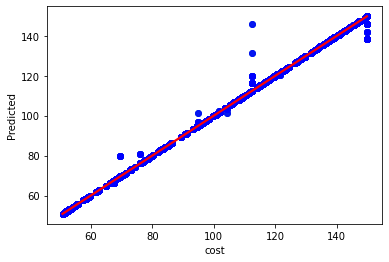

In [29]:
# Plot the result 
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
sns.regplot(x=y_test,y=y_pred,ci=None,scatter_kws={"color": "blue"}, line_kws={"color": "red"})